In [1]:
"""
Flat Dynamic run for ANDES, the following code is used to run a dynamic simulation of IEEE 14 bus system
"""

'\nFlat Dynamic run for ANDES, the following code is used to run a dynamic simulation of IEEE 14 bus system\n'

In [1]:
# import packages
import andes
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read in a case
case_raw_path = "../../models/grid_models/andes_IEEE14.raw"
case_dyr_path = "../../models/grid_models/andes_IEEE14.dyr"
ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)
ss.setup()  # need to call setup to initialize the system

Generating code for 1 models on 2 processes.


True

In [3]:
ss.TGOV1.as_df()

,idx,u,name,syn,Tn,wref0,R,VMAX,VMIN,T1,T2,T3,Dt
uid,,,,,,,,,,,,,
0,TGOV1_1,1.0,TGOV1_1,GENROU_1,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0
1,TGOV1_2,1.0,TGOV1_2,GENROU_4,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0
2,TGOV1_3,1.0,TGOV1_3,GENROU_5,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0


In [4]:
# run power flow
ss.PFlow.run()

True

In [5]:
# review Bus data
ss.Bus.as_df()

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
0,1,1.0,BUS1,69.0,1.1,0.9,1.03000,0.000000,0,0,1,1,1
1,2,1.0,BUS2,69.0,1.1,0.9,1.01970,-0.027981,0,0,1,1,1
2,3,1.0,BUS3,69.0,1.1,0.9,1.00042,-0.060097,0,0,1,1,1
3,4,1.0,BUS4,69.0,1.1,0.9,0.99858,-0.074721,0,0,1,1,1
4,5,1.0,BUS5,69.0,1.1,0.9,1.00443,-0.064315,0,0,1,1,1
5,6,1.0,BUS6,138.0,1.1,0.9,0.99871,-0.109998,0,0,2,2,2
6,7,1.0,BUS7,138.0,1.1,0.9,1.00682,-0.084285,0,0,2,2,2
7,8,1.0,BUS8,69.0,1.1,0.9,1.01895,-0.024339,0,0,2,2,2
8,9,1.0,BUS9,138.0,1.1,0.9,1.00193,-0.127502,0,0,2,2,2


Generating code for 97 models on 2 processes.


The honest Newton method is being used. It will slow down the simulation.
For speed up, set `honest=0` in TDS.config.


<Fault Fault_1>: Applying fault on Bus (idx=2) at t=1.0 sec.
<Fault Fault_1>: Clearing fault on Bus (idx=2) at t=1.2 sec.


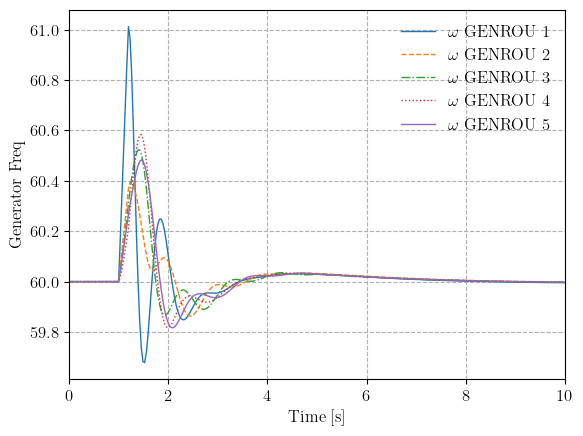

In [6]:
# Flat run
case_raw_path = "./andes_IEEE14.raw"
case_dyr_path = "./andes_IEEE14.dyr"

ss_base_fault = andes.load(
    case_raw_path, addfile=case_dyr_path, codegen=True, setup=False
)

ss_base_fault.add("Fault", dict(bus=2, tf=1.0, tc=1.2))

ss_base_fault.setup()  # no `ss.add()` calls are allowed after setup()

ss_base_fault.PFlow.config.method = "NR"

ss_base_fault.PFlow.run()
ss_base_fault.TDS.config.tf = 10  # simulate for 3 mins 0 seconds to save time
ss_base_fault.TDS.config.no_tqdm = 1  # disable progres bar printing
ss_base_fault.TDS.config.method = "trapezoid"
ss_base_fault.TDS.config.honest = 1
ss_base_fault.TDS.config.qrt = 1
ss_base_fault.TDS.config.refresh_event = 1
ss_base_fault.TDS.config.linsolve = 1
ss_base_fault.TDS.tstep = 1 / 120
ss_base_fault.TDS.run()

fig, ax = ss_base_fault.TDS.plotter.plot(
    ss_base_fault.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    ylabel="Generator Freq",
    grid=True,
    set_ylim=True,
)

The honest Newton method is being used. It will slow down the simulation.
For speed up, set `honest=0` in TDS.config.


  0%|          | 0/100 [00:00<?, ?%/s]

<Fault Fault_1>: Applying fault on Bus (idx=2) at t=1.0 sec.
<Fault Fault_1>: Clearing fault on Bus (idx=2) at t=1.2 sec.


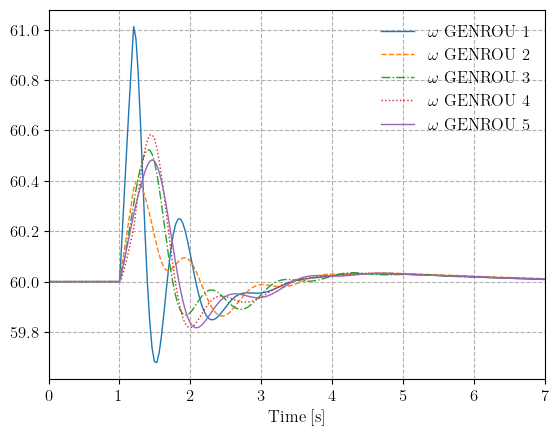

In [7]:
# Fault at bus 2 withOUT Damping
# using as baseline

case_raw_path = "./andes_IEEE14.raw"
case_dyr_path = "./andes_IEEE14.dyr"

ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)

ss.add("Fault", dict(bus=2, tf=1.0, tc=1.2))

ss.setup()  # no `ss.add()` calls are allowed after setup()

ss.PFlow.config.method = "NR"

ss.PFlow.run()
ss.TDS.config.tf = 7
ss.TDS.config.no_tqdm = 0
ss.TDS.set_method = "trapezoid"
ss.TDS.config.method = "trapezoid"
ss.TDS.config.honest = 1
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.config.linsolve = 1
ss.TDS.tstep = 0.001

ss.TDS.run()

fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
    set_ylim=True,
)

Old Damping: [0.0, 0.0, 0.0, 0.0, 0.0]
New Damping: [0.9, 0.9, 0.9, 0.1, 0.1]


  0%|          | 0/100 [00:00<?, ?%/s]

<Fault Fault_1>: Applying fault on Bus (idx=2) at t=1.0 sec.
<Fault Fault_1>: Clearing fault on Bus (idx=2) at t=1.2 sec.


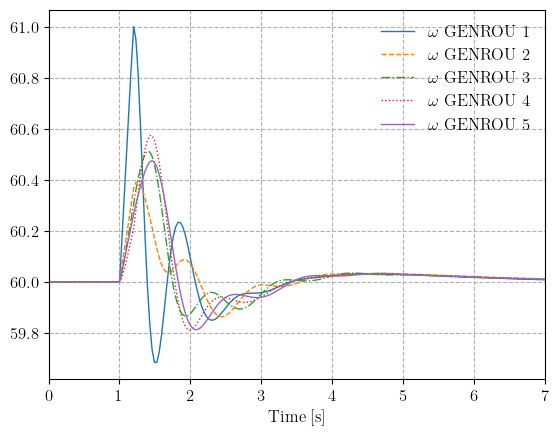

In [5]:
# Fault at bus 2 with Damping
# model has no damping support so makes sense that adjusting the damping wouldn't change the results
case_raw_path = "./andes_IEEE14.raw"
case_dyr_path = "./andes_IEEE14.dyr"
ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)
print("Old Damping: {}".format(ss.GENROU.D.v))
ss.GENROU.D.v = [0.1, 0.1, 0.1, 0.1, 0.1]


ss.GENROU.D.v[0] = 0.9
ss.GENROU.D.v[1] = 0.9
ss.GENROU.D.v[2] = 0.9


print("New Damping: {}".format(ss.GENROU.D.v))
ss.add("Fault", dict(bus=2, tf=1.0, tc=1.2))
ss.setup()
ss.PFlow.config.method = "NR"
ss.PFlow.run()
ss.TDS.config.tf = 7
ss.TDS.config.honest = 1
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.tstep = 0.001
ss.TDS.run()

fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
    set_ylim=True,
)

Suspect initialization issue! Simulation may crash!

    Name      | Var. Value | Eqn. Mismatch
--------------+------------+--------------
 LL_y TGOV1 2 | 0.300      | 0.200        
 LL_y TGOV1 3 | 0.350      | 0.150        


Initialization failed!!
If you are developing a new model, check the initialization with
   andes -v 10 run -r tds --init ./andes_IEEE14.raw
Otherwise, check the variables that are initialized out of limits.


Old VMAX: NumParam: TGOV1.VMAX, v=[1.05, 1.05, 1.05]
Old VMIN: NumParam: TGOV1.VMIN, v=[0.3, 0.3, 0.3]
NEW VMAX: NumParam: TGOV1.VMAX, v=[1.1, 1.1, 1.1]
NEW VMIN: NumParam: TGOV1.VMIN, v=[0.5, 0.5, 0.5]


  0%|          | 0/100 [00:00<?, ?%/s]

<Fault Fault_1>: Applying fault on Bus (idx=2) at t=1.0 sec.
<Fault Fault_1>: Clearing fault on Bus (idx=2) at t=1.2 sec.


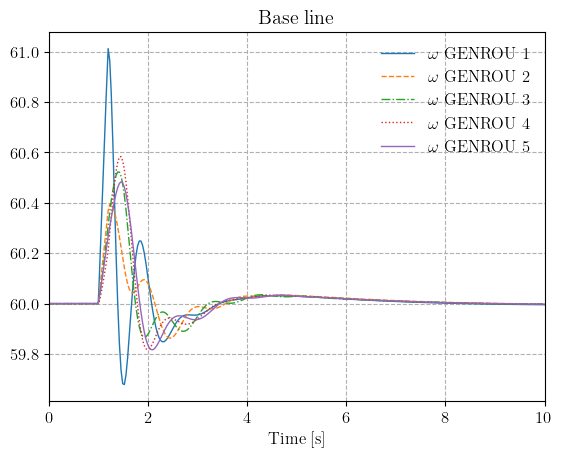

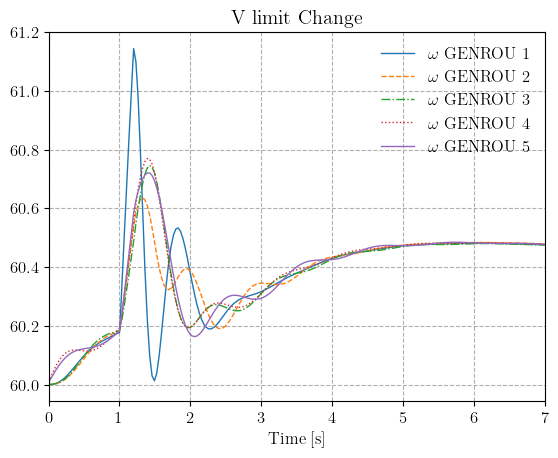

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'V limit Change'}, xlabel='Time [s]'>)

In [20]:
# Fault at bus 2 with VMAX and VMIN change
# see huge change in stability
# note that the gov is being changed here

case_raw_path = "./andes_IEEE14.raw"
case_dyr_path = "./andes_IEEE14.dyr"
ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)


print("Old VMAX: {}".format(ss.TGOV1.VMAX))
print("Old VMIN: {}".format(ss.TGOV1.VMIN))


for i in range(len(ss.TGOV1.VMAX.v)):
    ss.TGOV1.VMAX.v[i] = 1.1

for i in range(len(ss.TGOV1.VMIN.v)):
    ss.TGOV1.VMIN.v[i] = 0.5


print("NEW VMAX: {}".format(ss.TGOV1.VMAX))
print("NEW VMIN: {}".format(ss.TGOV1.VMIN))
ss.add("Fault", dict(bus=2, tf=1.0, tc=1.2))
ss.setup()
ss.PFlow.config.method = "NR"
ss.PFlow.run()
ss.TDS.config.tf = 7
ss.TDS.config.honest = 1
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.tstep = 0.001
ss.TDS.run()

ss_base_fault.TDS.plotter.plot(
    ss_base_fault.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    ax=ax,
    title="Base line",
    greyscale=True,
    grid=True,
)
ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    ax=ax,
    label="Baseline",
    title="V limit Change",
    greyscale=False,
    grid=True,
)

Old R: [0.05, 0.05, 0.05]
New R: [0.8, 0.8, 0.8]


  0%|          | 0/100 [00:00<?, ?%/s]

<Fault Fault_1>: Applying fault on Bus (idx=2) at t=1.0 sec.
<Fault Fault_1>: Clearing fault on Bus (idx=2) at t=1.2 sec.


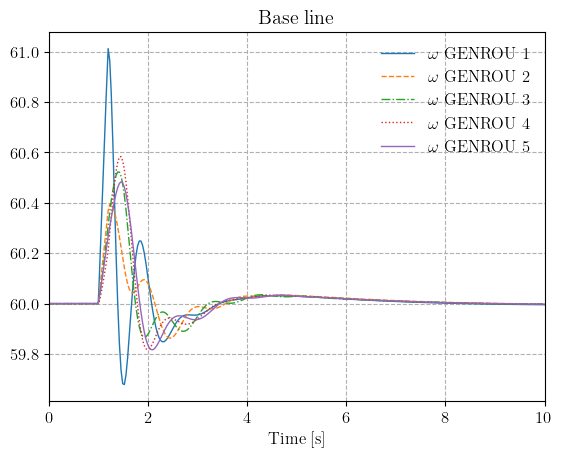

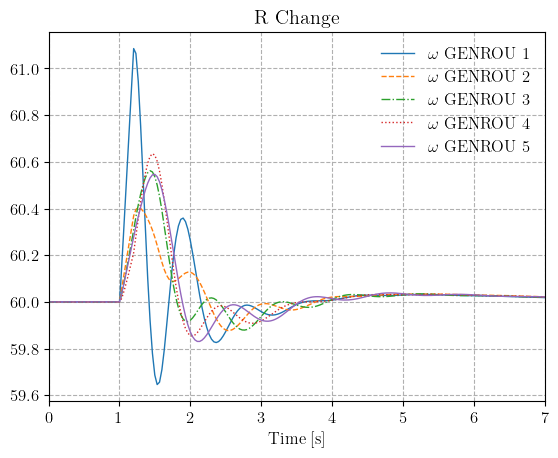

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'R Change'}, xlabel='Time [s]'>)

In [16]:
# Fault at bus 2 with change in R
# see huge change in stability
# note that the gov is being changed here

case_raw_path = "./andes_IEEE14.raw"
case_dyr_path = "./andes_IEEE14.dyr"
ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)


print("Old R: {}".format(ss.TGOV1.R.v))


for i in range(len(ss.TGOV1.R.v)):
    ss.TGOV1.R.v[i] = 0.8


print("New R: {}".format(ss.TGOV1.R.v))

ss.add("Fault", dict(bus=2, tf=1.0, tc=1.2))
ss.setup()
ss.PFlow.config.method = "NR"
ss.PFlow.run()
ss.TDS.config.tf = 7
ss.TDS.config.honest = 1
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.tstep = 0.001
ss.TDS.run()


ss_base_fault.TDS.plotter.plot(
    ss_base_fault.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    ax=ax,
    title="Base line",
    greyscale=True,
    grid=True,
)
ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    ax=ax,
    label="Baseline",
    title="R Change",
    greyscale=False,
    grid=True,
)

In [21]:
ss.TGOV1.Dt

NumParam: TGOV1.Dt, v=[0. 0. 0.], vin=[0. 0. 0.]

Old Dt: [0.0, 0.0, 0.0]
New Dt: [0.9, 0.9, 0.9]


  0%|          | 0/100 [00:00<?, ?%/s]

<Fault Fault_1>: Applying fault on Bus (idx=2) at t=1.0 sec.
<Fault Fault_1>: Clearing fault on Bus (idx=2) at t=1.2 sec.


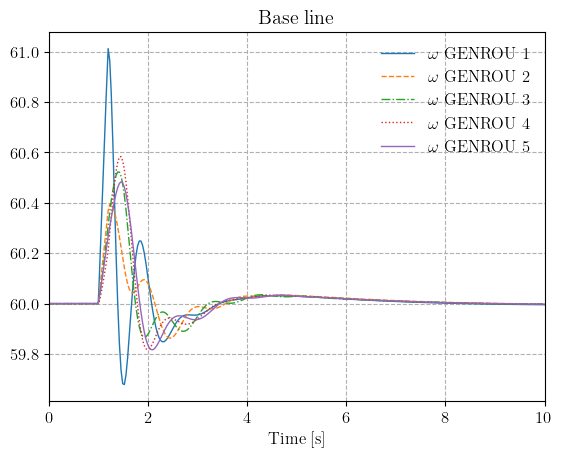

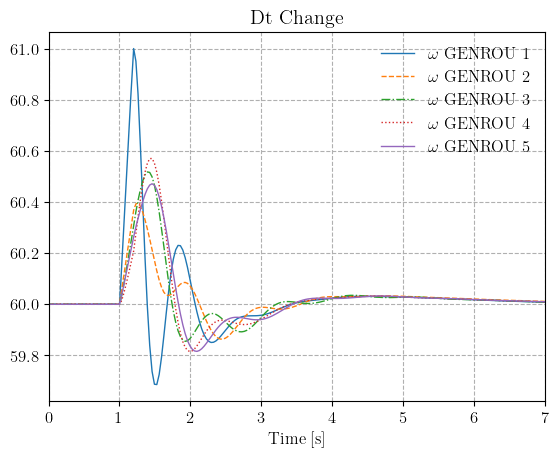

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Dt Change'}, xlabel='Time [s]'>)

In [25]:
# Fault at bus 2 with change in DT
# see huge change in stability
# note that the gov is being changed here

# Dt could be fixed in ANDES or PSSE
# solving in EMT
# pos sequence
# match reactive power output
#

case_raw_path = "./andes_IEEE14.raw"
case_dyr_path = "./andes_IEEE14.dyr"

import andes

ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)


print("Old Dt: {}".format(ss.TGOV1.Dt.v))


for i in range(len(ss.TGOV1.Dt.v)):
    ss.TGOV1.Dt.v[i] = 0.9


print("New Dt: {}".format(ss.TGOV1.Dt.v))

ss.add("Fault", dict(bus=2, tf=1.0, tc=1.2))
ss.setup()
ss.PFlow.config.method = "NR"
ss.PFlow.run()
ss.TDS.config.tf = 7
ss.TDS.config.honest = 1
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.tstep = 0.001
ss.TDS.run()


ss_base_fault.TDS.plotter.plot(
    ss_base_fault.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    ax=ax,
    title="Base line",
    greyscale=True,
    grid=True,
)
ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    ax=ax,
    label="Baseline",
    title="Dt Change",
    greyscale=False,
    grid=True,
)